# BIOS 512 Final Project
**Data Exploration of Men's Basketball at the University of Virginia**

In [25]:
library('tidyverse')
library('tibble')
library('scales')
library('patchwork')
library('googlesheets4')
options(repr.plot.width=9, repr.plot.height=8, repr.plot.res=200)

In [5]:
gs4_deauth()

In [21]:
NCAA <- read_sheet('1h80zRbdm8DvyWGXbMKMCdFNS-ll2JofBE7UttiVXxMM', sheet = 'School')

NCAA2 <- read_sheet('1h80zRbdm8DvyWGXbMKMCdFNS-ll2JofBE7UttiVXxMM', sheet = 'Opponent')

Conf <- read_sheet('1h80zRbdm8DvyWGXbMKMCdFNS-ll2JofBE7UttiVXxMM', sheet = 'Conference')

Virginia <- read_sheet('1h80zRbdm8DvyWGXbMKMCdFNS-ll2JofBE7UttiVXxMM', sheet = 'Virginia Season')

NCAA2 <- NCAA%>%inner_join(NCAA2,by="School")

NCAA <- NCAA2%>%inner_join(Conf,by="School")

P6 <- NCAA %>% filter(P6 == 'Yes')

✔ Reading from NCAA 2023-2024.

✔ Range ''School''.

✔ Reading from NCAA 2023-2024.

✔ Range ''Opponent''.

✔ Reading from NCAA 2023-2024.

✔ Range ''Conference''.

✔ Reading from NCAA 2023-2024.

✔ Range ''Virginia Season''.



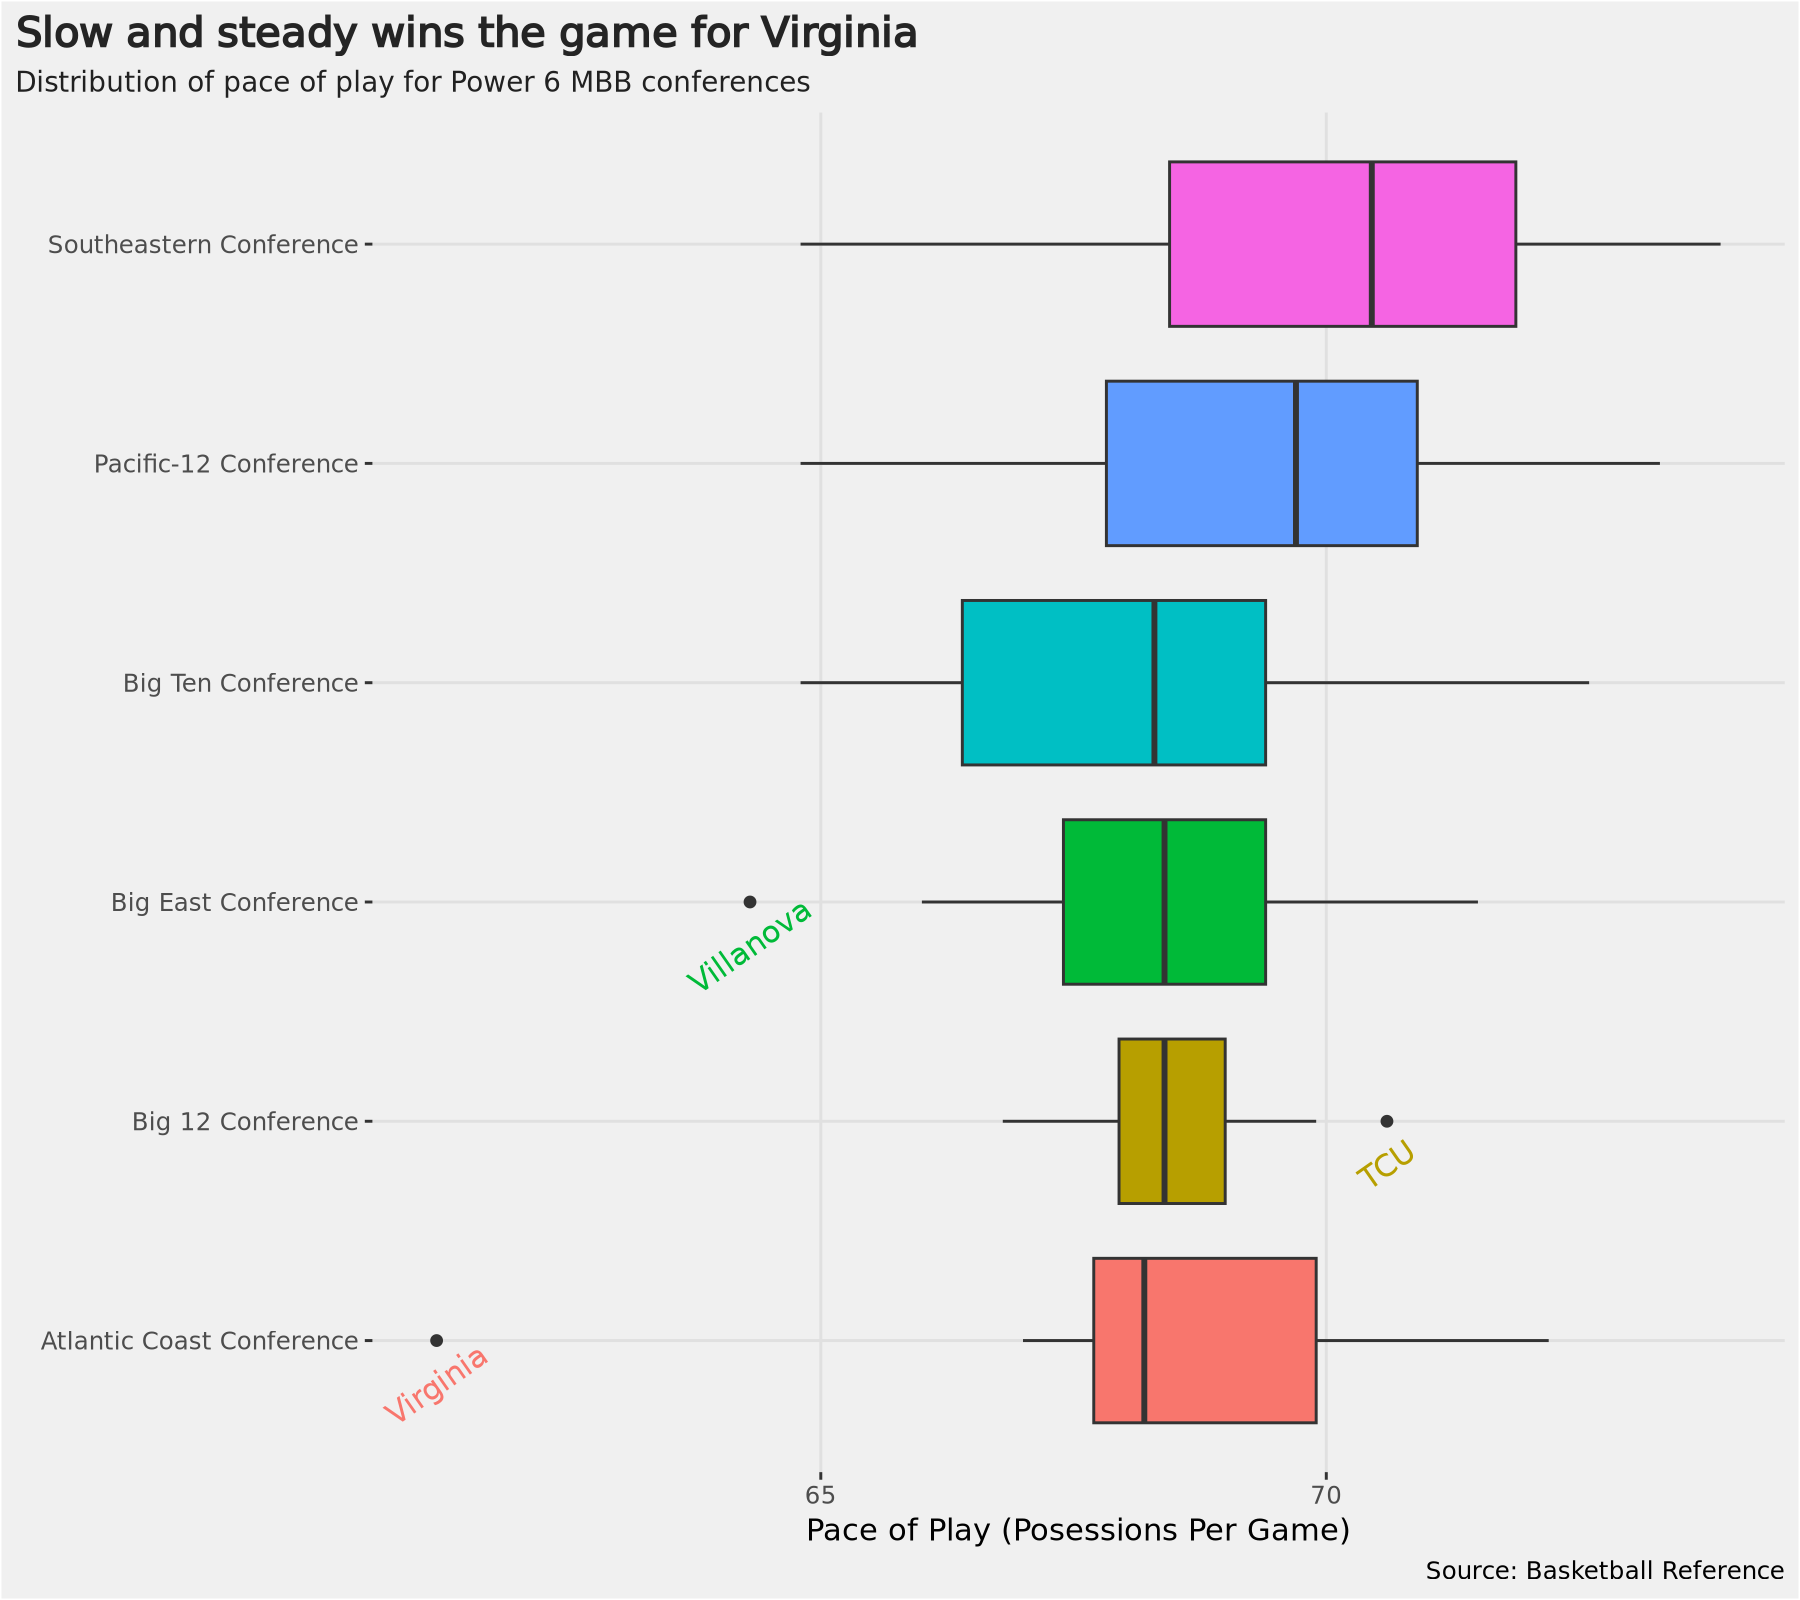

In [34]:
is_outlier <- function(x) {
  return(x < quantile(x, 0.25, na.rm = T) - 1.5 * IQR(x, na.rm = T) | x > quantile(x, 0.75, na.rm = T) + 1.5 * IQR(x, na.rm = T))
}

P62 <- P6 %>%
  column_to_rownames('School')

dat <- P62 %>% tibble::rownames_to_column(var="outlier") %>% group_by(Conference) %>% 
    mutate(is_outlier=ifelse(is_outlier(Pace), Pace, as.numeric(NA))) 

dat$outlier[which(is.na(dat$is_outlier))] <- as.numeric(NA)

bg = '#f0f0f0'

ggplot(dat, aes(y=Pace, x=factor(Conference), fill = Conference)) + geom_boxplot() + 
  geom_text(aes(label=outlier, color = Conference),na.rm=TRUE,nudge_x=-0.2, angle = 35) + 
  labs(x = '', y = "Pace of Play (Posessions Per Game)", title = 'Slow and steady wins the game for Virginia',
       caption = 'Source: Basketball Reference',
       subtitle ='Distribution of pace of play for Power 6 MBB conferences') +
  theme(legend.position = 'NA', plot.title.position = 'plot',
        panel.background = element_rect(fill = bg), 
        plot.background = element_rect(fill = bg),
        panel.grid.major = element_line(color = '#e0e0e0'),
        panel.grid.minor = element_blank(),
        plot.title = element_text(color = '#242424', face = 'bold', size = 15),
        plot.subtitle = element_text(color = '#212121', size = 10)) + coord_flip()

In [18]:
NCAA %>% filter(Conference == 'Atlantic Coast Conference') %>% 
  group_by(School) %>% 
  summarize(Conference.Standing = sum(Conf.W)) %>% arrange(desc(Conference.Standing))

School,Conference.Standing
<chr>,<dbl>
North Carolina,17
Duke,15
Virginia,13
Pittsburgh,12
Clemson,11
Syracuse,11
Wake Forest,11
Florida State,10
Virginia Tech,10


# Pace of Play

    When comparing the number of possessions each team in Division 1 of NCAA basketball, specifically the "Power 6" conferences containing the schools that compose the majority of at-large bids into the NCAA tournament at the end of the season, we see that there isn't too much variation within most schools. While there is certainly some difference in the spread and median values, each conference has values that exist within very similar ranges. Except for one school in particular, The University of Virginia in the Atlantic Coast Conference has by far the lowest pace of play in the country for a Power 6 school, only having around 60 possessions per game. One would think with a pace of play so incredibly low that it would translate into Virginia also being one of the worst teams in Division 1, but when taking a deeper dive into the ACC's conference standings we see that Virginia actually finished third in the Conference and received a bid to the NCAA tournament. With Virginia playing so slow that they receive upwards of 10 less possessions a game than other teams, how could they possibly overcome this disparity and end up beating these teams consistently? Let's take a deeper dive into the in-game statistics of Virginia's 2023-24 season to see how this is possible.

`summarise()` has grouped output by 'Site'. You can override using the
`.groups` argument.


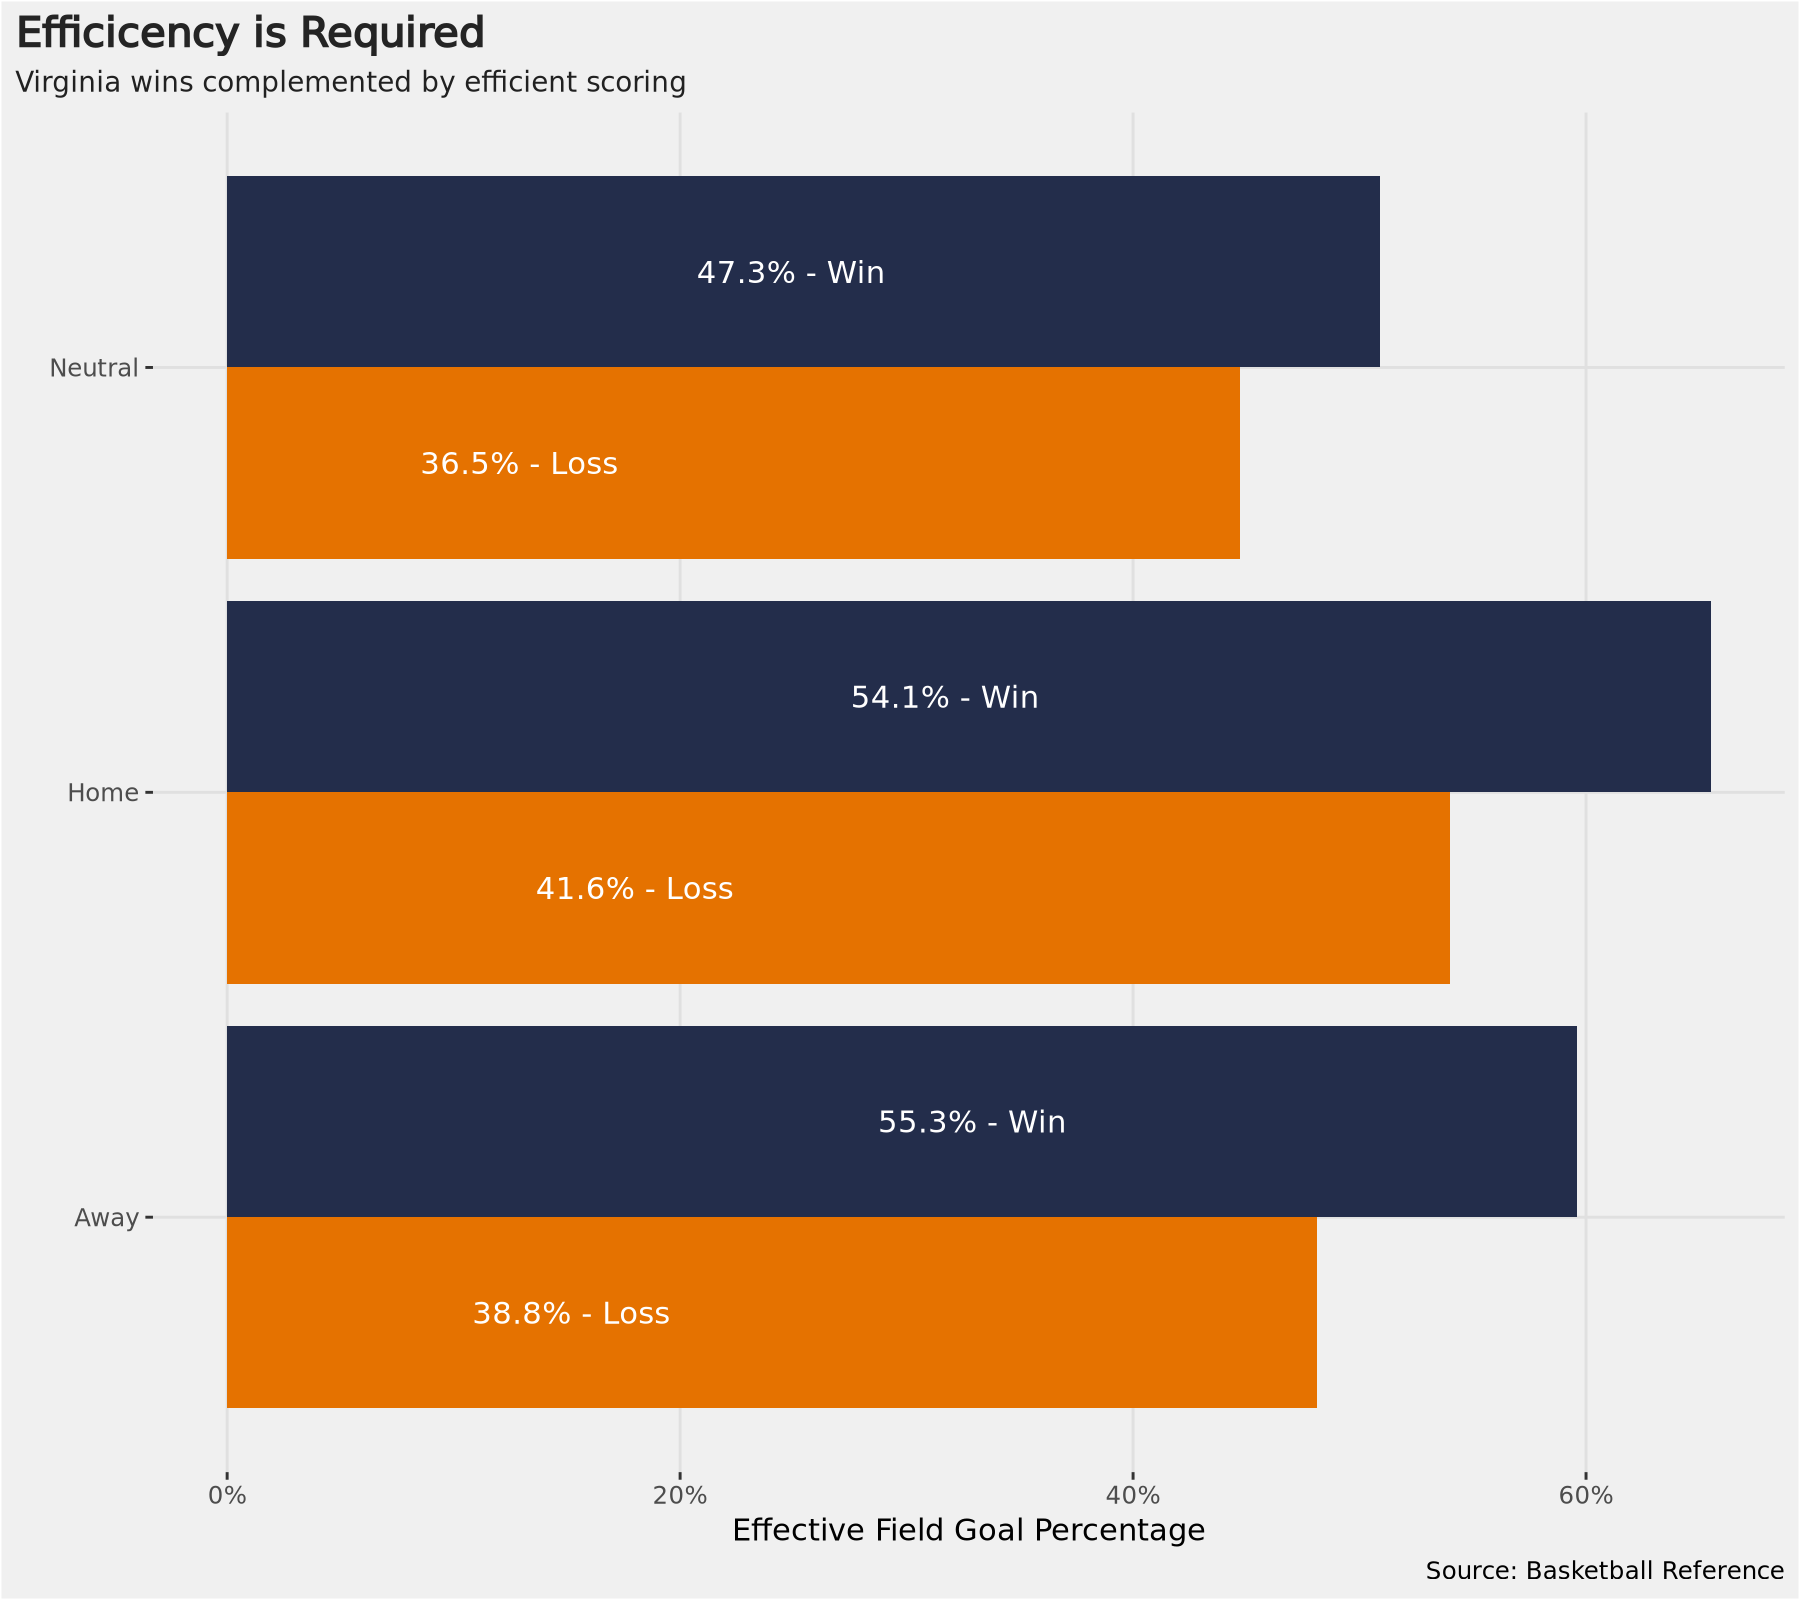

In [42]:
UVA <- c('#E57200', '#232D4B')

summary_data <- Virginia %>%
  group_by(Site, W.L) %>%
  summarize(Off.eFGPer = round(mean(Off.eFGPer), 3))

percentages <- summary_data %>% mutate(perc = paste0(sprintf("%1.1f", Off.eFGPer*100),"%"),
                                       perc = if_else(W.L == 'W', paste(perc, "- Win"), paste(perc, "- Loss"))
)

ggplot(Virginia, aes(x = Site, y = Off.eFGPer, fill = W.L)) + geom_bar(stat = 'identity', position = 'dodge') +
  #geom_errorbar(stat = 'summary', position = position_dodge(width = 0.9), width = 0.2) + 
  coord_flip() +
  geom_text(data = percentages, aes(label=perc), 
          position=position_dodge(width=0.9), hjust = 3.2, colour="white") + 
  labs(x = '', y = "Effective Field Goal Percentage", title = "Efficicency is Required", 
       subtitle = 'Virginia wins complemented by efficient scoring', caption = 'Source: Basketball Reference') + 
  scale_fill_manual(values = UVA) +
  scale_y_continuous(labels=percent_format()) + 
  theme(legend.position = 'NA', plot.title.position = 'plot',
        panel.background = element_rect(fill = bg), 
        plot.background = element_rect(fill = bg),
        panel.grid.major = element_line(color = '#e0e0e0'),
        panel.grid.minor = element_blank(),
        plot.title = element_text(color = '#242424', face = 'bold', size = 15),
        plot.subtitle = element_text(color = '#212121', size = 10))

# Efficicency

    The graph above breaks down the effective field goal percentage in each of Virginia's games in the 2023-24 season, grouping them by the site each game was played in as well as separating by whether the game resulted in a win and loss. With this analysis we see that for each win, virginia shot around or above 50%, with the losses being around the 35% eFG% range. The only site that seems to deviate from this slightly is the neutral sight wins, with Virginia shooting around 47% in these games. But when looking back at the schedule, we see that there were significantly less games at neutral sites than home or away, so it makes sense that the individual games had more impact on skewing this measure. Across the board we see that whenever Virginia wins a game, they often shoot above 50% from the field, indicating that in order to overcome their lack of possessions they need to make the most out of the few that they have and score efficicently. And while this is not something blatantly suggested by the data, it makes sense that in games that they are losing, Virginia will take less quality shots in order to try and speed up their pace of play and get back into the game, leading to the poor shooting performances we see in the losses. With this graph we can see how Virginia's offensive efficicency affects their winrate, but how about their opponent's performance?

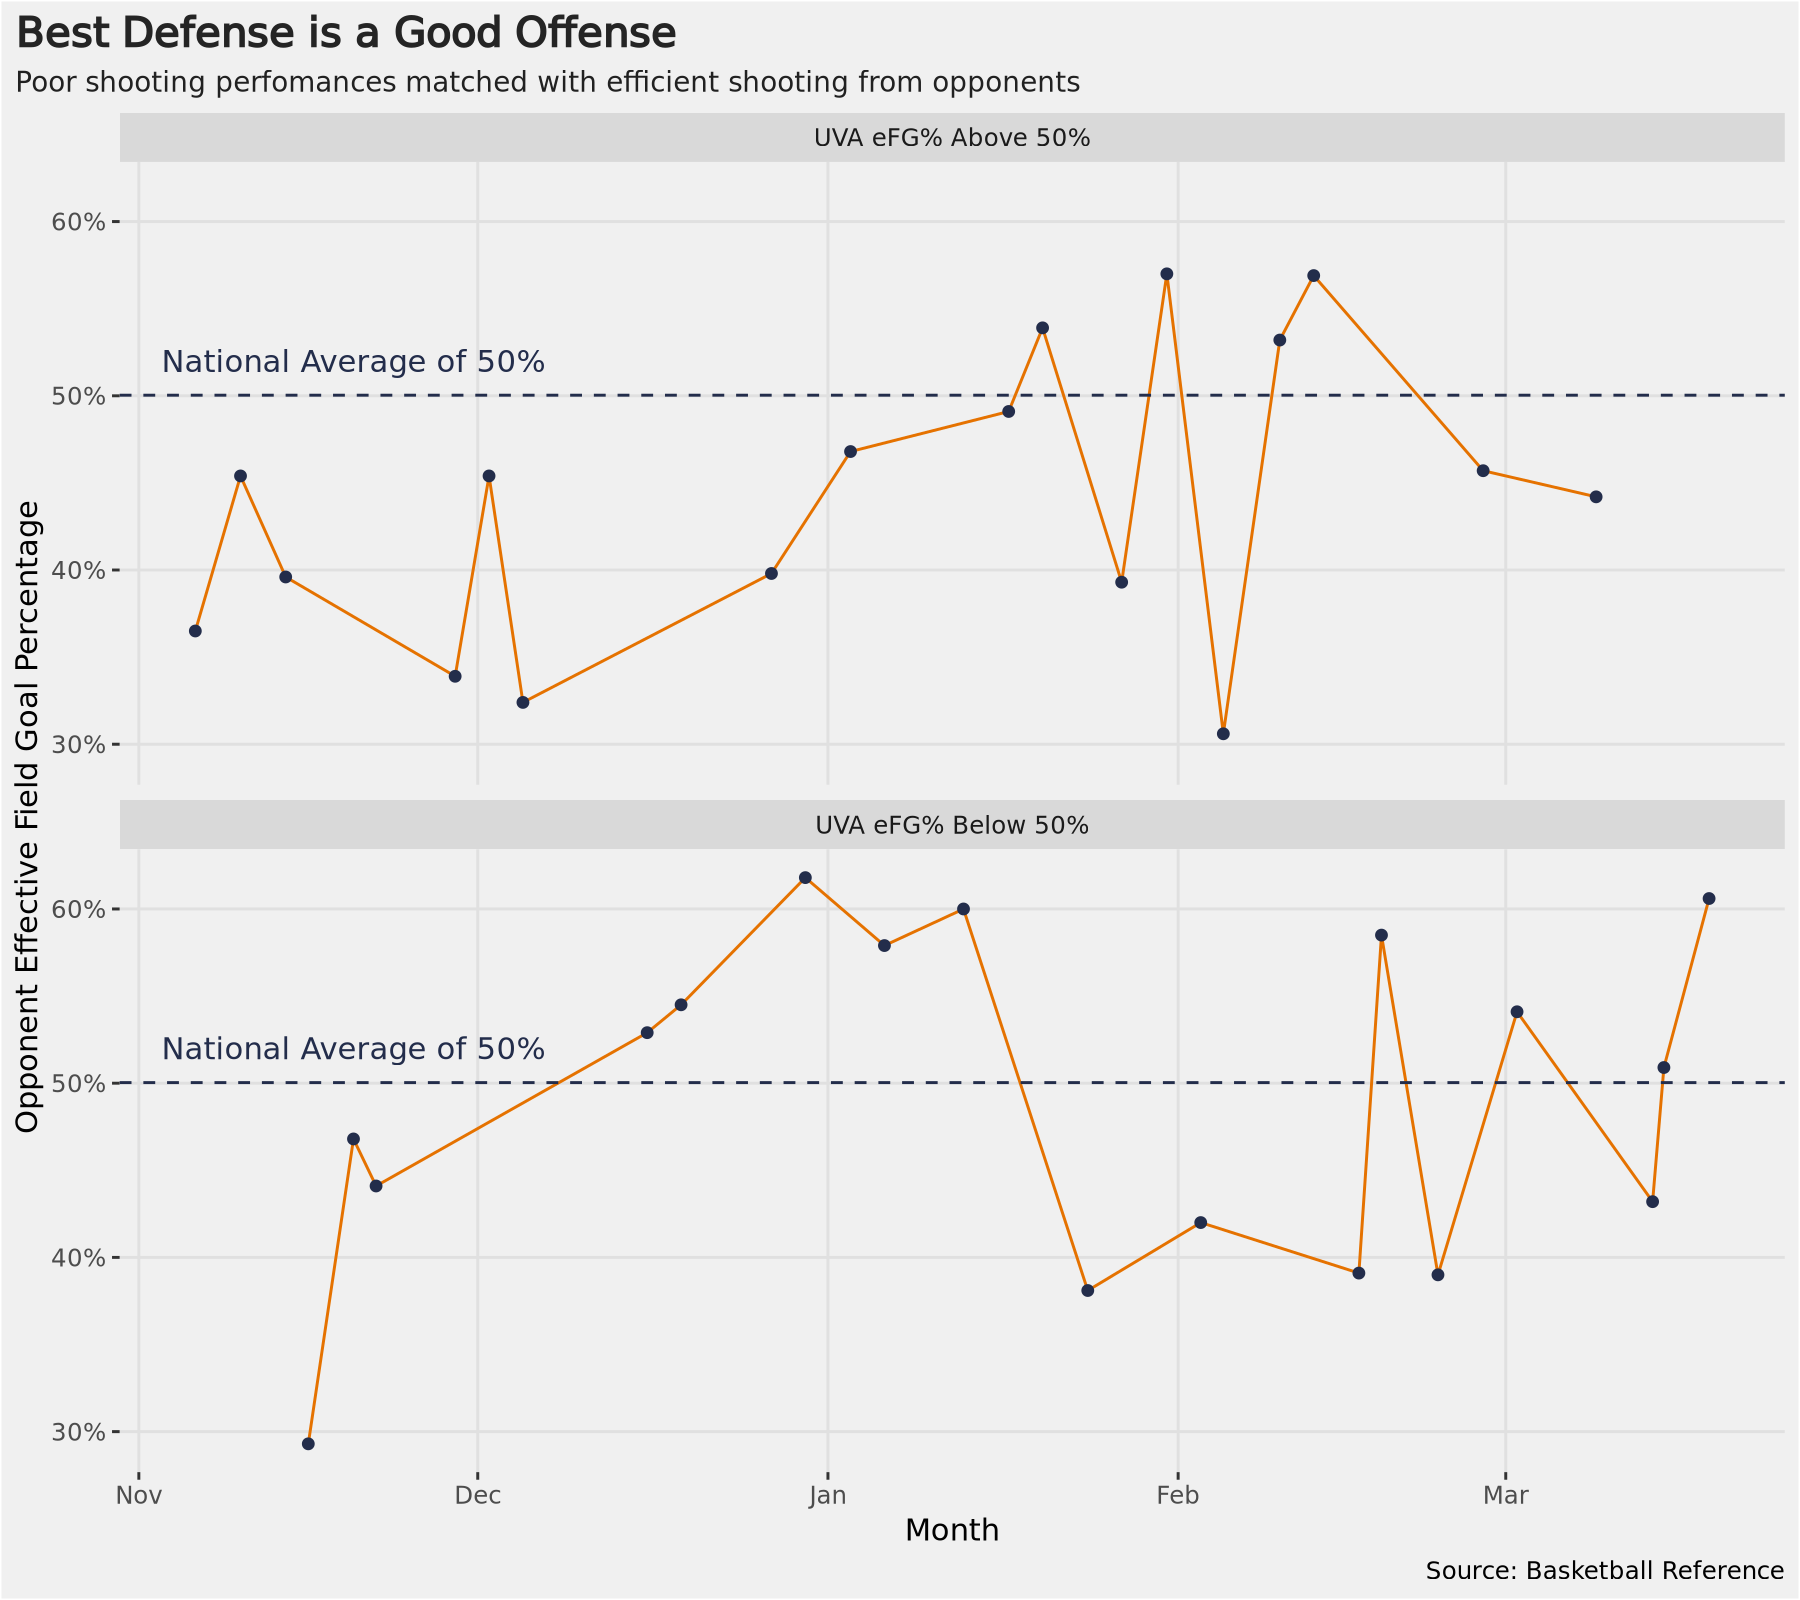

In [46]:
Virginia2 <- Virginia %>% mutate(Perfomance = ifelse(Off.eFGPer < 0.5, 'UVA eFG% Below 50%', 'UVA eFG% Above 50%'))

Virginia2$Date <- as.Date(Virginia2$Date)

lab <- data.frame(Date = c('2023-11-20'), Def.eFGPer = c(0.52), label = c('National Average of 50%'),
                  Performance = c('UVA eFG% Above 50%'))

lab$Date <- as.Date(lab$Date)

ggplot(Virginia2) + geom_line(aes(x = Date, y = Def.eFGPer), color = '#E57200') + 
  geom_point(aes(x = Date, y = Def.eFGPer), color = '#232D4B') +
  geom_hline(data = NCAA, aes(yintercept = mean(Opp.eFGPer)), color='#232D4B', linetype = 'dashed') +
  facet_wrap(~Perfomance, ncol = 1) + 
  geom_text(data = lab, aes(x = Date, y = Def.eFGPer, label = label, group = Performance), color = '#232D4B') +
  labs(x = 'Month', y = "Opponent Effective Field Goal Percentage", title = 'Best Defense is a Good Offense',
                                           subtitle = 'Poor shooting perfomances matched with efficient shooting from opponents',
                                           caption = 'Source: Basketball Reference') +
  scale_y_continuous(labels=percent_format()) + 
  theme(legend.position = 'NA', plot.title.position = 'plot',
        panel.background = element_rect(fill = bg), 
        plot.background = element_rect(fill = bg),
        panel.grid.major = element_line(color = '#e0e0e0'),
        panel.grid.minor = element_blank(),
        plot.title = element_text(color = '#242424', face = 'bold', size = 15),
        plot.subtitle = element_text(color = '#212121', size = 10))

# Opponent Performance

    If you are aware of the culture behind Virginia's basketball program, you would know that it is famous for its suffocating defense and ability to force opposing teams to play at their agonizingly slow pace of play. But just like every other aspect of the game, it makes sense that this attempt to smother the other team isn't always executed correctly in game, and often times teams are able to force Virginia to speed up their own pace of play. When looking at the graph above, we see that in games that Virginia shoots above 50% from the field, the other team often shoots well below the national average of 50%. This makes sense, as in order for Virginia's stifling defense to be established on each possessions, they need the time it takes for the other team to inbound the ball to set up their pack line defense. While whenever Virginia is not scoring efficiently and allowing the other team to possess the ball after a defensive rebound or a turnover, Virginia's defense is forced to scramble back to their half of the court and often is unable to properly set themselves up. This of course leading to the other team catching Virginia off guard and allowing them to establish their faster pace of play, keeping Virginia off balance and not letting them control how the game is played. We see that in games where Virginia shoots less than 50%, the other team shoots well above the national average, indicating that Virginia's defense is rendered ineffective against these fast-paced and high-scoring teams when they are not allowed to control the pace of play. With all that has been discussed above, it is clear that with Virginia's low number of possessions per game, it is absolutely necessary that they accompany this slow paced with efficient offense in order for them to control all aspects of the game and force the other team to play a style that makes them uncomfortable. When Virginia is firing on all cylinders we see that they are almost an impossible team to beat, but this requires perfect execution every single night, which just isn't possible. So the ACC rankings we covered earlier make much more sense in this context, with Virginia controlling games that they performed well in, and letting a few slip away when the other team was able to force them to shift away from their normal style of play.

# References

1. https://www.sports-reference.com/cbb/seasons/men/2024-school-stats.html
2. https://www.sports-reference.com/cbb/schools/virginia/men/2024-gamelogs.html